In [143]:
%matplotlib inline 
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt

########
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

warnings.filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')

In [144]:
LA_data_df = pd.read_csv('LA.csv', na_values=[' ','Nan','nan',''])
LA_data_df.drop(['PIPE_SHAPE','OBJECTID'],axis=1, inplace=True)
LA_data_df.sample(5)

,UP_INV,DN_INV,PIPE_LENG,SLOPE_PCT,PIPE_SIZE,PIPE_MAT,REHAB,YEAR_INST,PIPE_STATUS
15186,919.02,895.11,265.00,0.0916,8.0,UNK,No,1957,F
100523,231.61,230.62,321.00,0.0033,22.0,VCP,No,1894,F
10598,747.28,739.89,201.60,0.0374,8.0,CON,Yes,1930,F
12041,326.12,324.40,220.04,0.0080,14.0,VCP,No,1928,F
75344,785.86,784.45,325.00,0.0040,8.0,VCP,No,1972,F


In [145]:
LA_data_df.isnull().sum()

UP_INV          768
DN_INV          707
PIPE_LENG        20
SLOPE_PCT       486
PIPE_SIZE        37
PIPE_MAT         90
REHAB           703
YEAR_INST      1818
PIPE_STATUS       7
dtype: int64

In [146]:
LA_data_df.shape

(160902, 9)

In [147]:
LA_data_df['PIPE_MAT'].value_counts()

VCP     133701
CON      14884
UNK       5782
RCP       2035
PVC       1308
CIP        915
B/C        791
DIP        584
HDPE       255
ABS        225
GFR        115
STL         98
ACP         53
PCP         33
PEP         15
CMP          6
TRS          4
CIPC         4
TCP          2
RCPL         2
Name: PIPE_MAT, dtype: int64

In [148]:
import seaborn as sns
#sns.swarmplot(x='PIPE_MAT', y='PIPE_LENG', data=LA_data_df)
#plt.show();

In [149]:
LA_data_df = LA_data_df.dropna(axis=0)
LA_data_df.sample(10)

,UP_INV,DN_INV,PIPE_LENG,SLOPE_PCT,PIPE_SIZE,PIPE_MAT,REHAB,YEAR_INST,PIPE_STATUS
132816,689.59,686.98,330.20,0.0080,15.0,VCP,No,1930,F
145093,9.98,9.00,122.00,0.0081,8.0,VCP,No,2010,F
54902,462.58,461.84,40.30,0.0184,8.0,VCP,No,1924,F
97200,664.97,664.45,91.04,0.0040,8.0,VCP,No,1950,F
86015,123.40,115.21,2868.69,0.0028,132.0,RCP,No,2005,F
29126,98.44,95.83,120.50,0.0176,15.0,CON,No,1927,F
75036,777.90,777.47,169.60,0.1500,18.0,VCP,No,1960,S
134577,168.82,163.34,330.10,0.0168,8.0,CON,No,1925,F
80988,145.67,144.49,295.00,0.0040,8.0,VCP,No,1927,F
984,996.70,994.20,159.65,0.0162,8.0,VCP,No,1967,F


In [150]:
LA_data_df.shape

(157422, 9)

In [42]:
#LA_data_df['YEAR_INST'].value_counts()

In [151]:
LA_data_df = LA_data_df[pd.to_numeric(LA_data_df['YEAR_INST'], errors='coerce').notnull()]

In [152]:
LA_data_df["YEAR_INST"] = pd.to_numeric(LA_data_df["YEAR_INST"])

In [153]:
LA_data_df = LA_data_df[LA_data_df['YEAR_INST'] > 1000]  

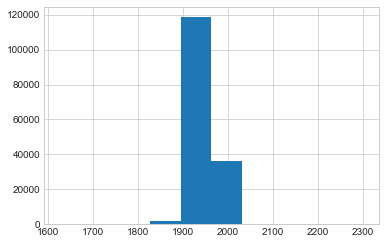

In [154]:
plt.hist(LA_data_df['YEAR_INST']);

In [155]:
LA_data_df.isnull().sum()

UP_INV         0
DN_INV         0
PIPE_LENG      0
SLOPE_PCT      0
PIPE_SIZE      0
PIPE_MAT       0
REHAB          0
YEAR_INST      0
PIPE_STATUS    0
dtype: int64

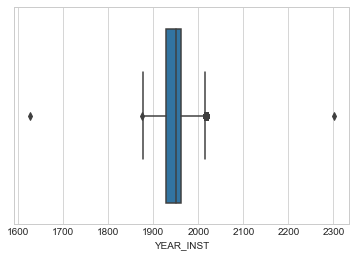

In [156]:
import seaborn as sns
sns.boxplot(x=LA_data_df['YEAR_INST'])

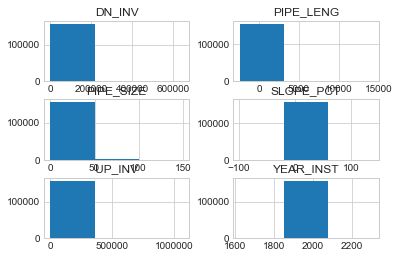

In [157]:
hist = LA_data_df.hist(bins=3)

In [158]:
LA_data_df.describe()

,UP_INV,DN_INV,PIPE_LENG,SLOPE_PCT,PIPE_SIZE,YEAR_INST
count,1.565100e+05,156510.000000,156510.000000,156510.000000,156510.000000,156510.000000
mean,5.388799e+02,523.350792,228.788637,-0.371606,10.215143,1947.904485
std,4.105524e+03,1688.467515,160.713734,6.320430,8.572656,25.436795
min,-1.436600e+02,-141.360000,-2464.700000,-99.000000,0.000000,1625.000000
25%,1.586425e+02,161.030000,134.400000,0.004000,8.000000,1927.000000
50%,4.944300e+02,494.440000,245.000000,0.007200,8.000000,1951.000000
75%,8.050000e+02,803.207500,318.600000,0.025200,8.000000,1962.000000
max,1.071084e+06,649046.000000,14171.000000,137.600000,150.000000,2301.000000


In [159]:
LA_data_df.shape

(156510, 9)

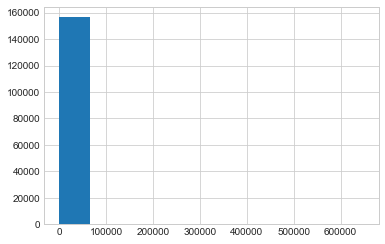

In [160]:
plt.hist(LA_data_df.DN_INV);

In [161]:
LA_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156510 entries, 0 to 160901
Data columns (total 9 columns):
UP_INV         156510 non-null float64
DN_INV         156510 non-null float64
PIPE_LENG      156510 non-null float64
SLOPE_PCT      156510 non-null float64
PIPE_SIZE      156510 non-null float64
PIPE_MAT       156510 non-null object
REHAB          156510 non-null object
YEAR_INST      156510 non-null float64
PIPE_STATUS    156510 non-null object
dtypes: float64(6), object(3)
memory usage: 11.9+ MB


In [105]:
LA_data_df.describe()

,UP_INV,DN_INV,PIPE_LENG,SLOPE_PCT,PIPE_SIZE,YEAR_INST
count,1.565100e+05,156510.000000,156510.000000,156510.000000,156510.000000,156510.000000
mean,5.388799e+02,523.350792,228.788637,-0.371606,10.215143,1947.904485
std,4.105524e+03,1688.467515,160.713734,6.320430,8.572656,25.436795
min,-1.436600e+02,-141.360000,-2464.700000,-99.000000,0.000000,1625.000000
25%,1.586425e+02,161.030000,134.400000,0.004000,8.000000,1927.000000
50%,4.944300e+02,494.440000,245.000000,0.007200,8.000000,1951.000000
75%,8.050000e+02,803.207500,318.600000,0.025200,8.000000,1962.000000
max,1.071084e+06,649046.000000,14171.000000,137.600000,150.000000,2301.000000


In [162]:
LA_data_df = pd.get_dummies(LA_data_df, columns=['PIPE_MAT'])
LA_data_df.head()

,UP_INV,DN_INV,PIPE_LENG,SLOPE_PCT,PIPE_SIZE,REHAB,YEAR_INST,PIPE_STATUS,PIPE_MAT_ABS,PIPE_MAT_ACP,...,PIPE_MAT_PCP,PIPE_MAT_PEP,PIPE_MAT_PVC,PIPE_MAT_RCP,PIPE_MAT_RCPL,PIPE_MAT_STL,PIPE_MAT_TCP,PIPE_MAT_TRS,PIPE_MAT_UNK,PIPE_MAT_VCP
0,88.11,70.38,345.00,0.0520,8.0,No,1916.0,F,0,0,...,0,0,0,0,0,0,0,0,0,1
1,126.81,116.41,230.00,0.0460,8.0,Yes,1916.0,F,0,0,...,0,0,0,0,0,0,0,0,0,1
2,180.94,145.06,345.05,0.1052,8.0,No,1917.0,F,0,0,...,0,0,0,0,0,0,0,0,0,1
3,132.91,115.71,348.00,0.0500,8.0,No,2013.0,F,0,0,...,0,0,0,0,0,0,0,0,0,1
4,13.07,12.40,335.20,0.0020,24.0,No,1983.0,F,0,0,...,0,0,0,0,0,0,0,0,0,1


In [163]:
LA_data_df = pd.get_dummies(LA_data_df, columns=['PIPE_STATUS'])

In [164]:
#convert target into numerical value
LA_data_df['REHAB'] = LA_data_df.REHAB.astype("category").cat.codes

In [165]:
y = LA_data_df['REHAB']
X = LA_data_df.drop(['REHAB'], axis=1)

In [64]:
y.shape

(156510,)

In [77]:
X.shape

(156510, 36)

In [166]:
LA_data_df.head()

,UP_INV,DN_INV,PIPE_LENG,SLOPE_PCT,PIPE_SIZE,REHAB,YEAR_INST,PIPE_MAT_ABS,PIPE_MAT_ACP,PIPE_MAT_B/C,...,PIPE_MAT_VCP,PIPE_STATUS_A,PIPE_STATUS_F,PIPE_STATUS_I,PIPE_STATUS_L,PIPE_STATUS_N,PIPE_STATUS_P,PIPE_STATUS_R,PIPE_STATUS_S,PIPE_STATUS_T
0,88.11,70.38,345.00,0.0520,8.0,0,1916.0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,126.81,116.41,230.00,0.0460,8.0,1,1916.0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2,180.94,145.06,345.05,0.1052,8.0,0,1917.0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3,132.91,115.71,348.00,0.0500,8.0,0,2013.0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4,13.07,12.40,335.20,0.0020,24.0,0,1983.0,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [167]:
X.columns

Index(['UP_INV', 'DN_INV', 'PIPE_LENG', 'SLOPE_PCT', 'PIPE_SIZE', 'YEAR_INST',
       'PIPE_MAT_ABS', 'PIPE_MAT_ACP', 'PIPE_MAT_B/C', 'PIPE_MAT_CIP',
       'PIPE_MAT_CIPC', 'PIPE_MAT_CMP', 'PIPE_MAT_CON', 'PIPE_MAT_DIP',
       'PIPE_MAT_GFR', 'PIPE_MAT_HDPE', 'PIPE_MAT_PCP', 'PIPE_MAT_PEP',
       'PIPE_MAT_PVC', 'PIPE_MAT_RCP', 'PIPE_MAT_RCPL', 'PIPE_MAT_STL',
       'PIPE_MAT_TCP', 'PIPE_MAT_TRS', 'PIPE_MAT_UNK', 'PIPE_MAT_VCP',
       'PIPE_STATUS_A', 'PIPE_STATUS_F', 'PIPE_STATUS_I', 'PIPE_STATUS_L',
       'PIPE_STATUS_N', 'PIPE_STATUS_P', 'PIPE_STATUS_R', 'PIPE_STATUS_S',
       'PIPE_STATUS_T'],
      dtype='object')

In [246]:
#MLP

'''
from sklearn.manifold import Isomap
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3 , random_state=0)
model = MLPClassifier(solver='lbfgs', activation='relu', random_state=0,hidden_layer_sizes=[5,2])    
model.fit(X_train,y_train)

y_train_hat = model.predict(X_train) #in-sample
y_test_hat = model.predict(X_test) #out-of-sample     
                      
in_sample_acc = accuracy_score(y_train, y_train_hat)
out_of_sample_acc = accuracy_score(y_test, y_test_hat)

print("Accuracy of in_sample data {}".format(in_sample_acc))
print("Accuracy of Out_of_sample data {}".format(out_of_sample_acc));
'''

'\nfrom sklearn.manifold import Isomap\nfrom sklearn.neural_network import MLPClassifier\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import accuracy_score\n\nX_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3 , random_state=0)\nmodel = MLPClassifier(solver=\'lbfgs\', activation=\'relu\', random_state=0,hidden_layer_sizes=[5,2])    \nmodel.fit(X_train,y_train)\n\ny_train_hat = model.predict(X_train) #in-sample\ny_test_hat = model.predict(X_test) #out-of-sample     \n                      \nin_sample_acc = accuracy_score(y_train, y_train_hat)\nout_of_sample_acc = accuracy_score(y_test, y_test_hat)\n\nprint("Accuracy of in_sample data {}".format(in_sample_acc))\nprint("Accuracy of Out_of_sample data {}".format(out_of_sample_acc));\n'

In [247]:
# LogistRegression
'''
from sklearn.linear_model import LogisticRegression
LogR = LogisticRegression(solver='lbfgs', random_state=0)
LogR.fit(X_train, y_train)

y_train_hat = LogR.predict(X_train)
y_test_hat = LogR.predict(X_test)

in_sample_acc = accuracy_score(y_train, y_train_hat)
out_of_sample_acc = accuracy_score(y_test, y_test_hat)

print("Accuracy of in_sample data {}".format(in_sample_acc))
print("Accuracy of Out_of_sample data {}".format(out_of_sample_acc));
'''

'\nfrom sklearn.linear_model import LogisticRegression\nLogR = LogisticRegression(solver=\'lbfgs\', random_state=0)\nLogR.fit(X_train, y_train)\n\ny_train_hat = LogR.predict(X_train)\ny_test_hat = LogR.predict(X_test)\n\nin_sample_acc = accuracy_score(y_train, y_train_hat)\nout_of_sample_acc = accuracy_score(y_test, y_test_hat)\n\nprint("Accuracy of in_sample data {}".format(in_sample_acc))\nprint("Accuracy of Out_of_sample data {}".format(out_of_sample_acc));\n'

In [111]:
# random forest 
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import Isomap
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3 , random_state=0)

#initialize
RFC = RandomForestClassifier(n_estimators=100)
RFC.fit(X_train, y_train)

y_train_hat = RFC.predict(X_train)
y_test_hat = RFC.predict(X_test) #out-of-sample

in_sample_acc = accuracy_score(y_train, y_train_hat)
out_of_sample_acc = accuracy_score(y_test, y_test_hat)

print("Accuracy of in_sample data {}".format(in_sample_acc))
print("Accuracy of Out_of_sample data {}".format(out_of_sample_acc));

Accuracy of in_sample data 0.9998174466259573
Accuracy of Out_of_sample data 0.9406214725363662


In [112]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
MAE = mean_absolute_error(y_test,y_test_hat)
MSE = mean_squared_error(y_test,y_test_hat)
RMSE = np.sqrt(MSE)

print("MAE = {}".format(MAE))
print("MSE = {}".format(MSE))
print("RMSE = {}".format(RMSE))

MAE = 0.05937852746363385
MSE = 0.05937852746363385
RMSE = 0.24367709671537424


In [180]:
X.drop(['PIPE_STATUS_T'],axis=1, inplace=True)

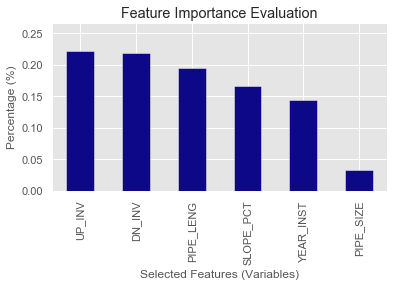

In [237]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
#print(model.feature_importances_) 
import seaborn as sns
sns.set()
plt.style.use('ggplot')
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='bar', cmap='plasma', grid=True)
plt.title('Feature Importance Evaluation')
plt.xlabel('Selected Features (Variables)')
plt.margins(0.2)
plt.ylabel('Percentage (%)')
plt.subplots_adjust(bottom=0.30)
plt.show();

In [202]:
from sklearn.metrics import r2_score
from rfpimp import permutation_importances

def r2(RFC, X_train, y_train):
    return r2_score(y_train, RFC.predict(X_train))

perm_imp_rfpimp = permutation_importances(RFC, X_train, y_train, r2)

In [76]:
# Extract single tree
estimator = RFC.estimators_[2]

from sklearn.tree import export_graphviz
import pydot

export_graphviz(estimator,
                feature_names=X.columns,
                filled=True,
                rounded=True)


# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')

In [44]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
accuracy_rfc = cross_val_score(RFC, X, y, cv=cv, scoring='accuracy')

print("Cross Validation Scores for Random Forest: {}".format(accuracy_rfc))
print("Mean Accuracy Score for Random Forest: {}".format(np.mean(accuracy_rfc)))

Cross Validation Scores for Random Forest: [0.94029326 0.93885375 0.93923711 0.93990799 0.9395227 ]
Mean Accuracy Score for Random Forest: 0.9395629622991267


In [250]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [10,20,30,40,50,100]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(RFC, param_grid, cv = cv, scoring='accuracy',
                    return_train_score=True)
grid.fit(X, y)

print("Best Parameter: {}".format(grid.best_params_))
print("Best Cross Vlidation Score: {}".format(grid.best_score_))

Best Parameter: {'n_estimators': 100}
Best Cross Vlidation Score: 0.9306151645207439


In [251]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_hat))

             precision    recall  f1-score   support

          N       0.94      0.99      0.96     44207
          Y       0.43      0.13      0.20      3186

avg / total       0.91      0.93      0.91     47393



In [370]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_hat)

array([[43624,   583],
       [ 2755,   431]])

In [52]:
y_test.unique()

array(['No', 'Yes'], dtype=object)

In [56]:
y_test = y_test.astype("category").cat.codes

In [57]:
y_test.unique()

array([0, 1])

In [46]:
 RFC.predict_proba(X_test)

array([[1.  , 0.  ],
       [0.92, 0.08],
       [0.86, 0.14],
       ...,
       [0.96, 0.04],
       [0.95, 0.05],
       [1.  , 0.  ]])

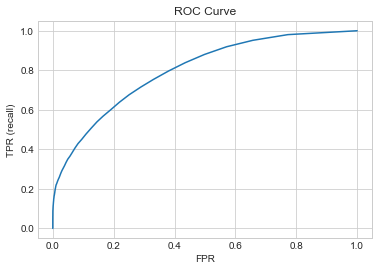

In [79]:
from sklearn.metrics import roc_curve

probs = RFC.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, thresholds = roc_curve(y_test, preds)

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.title('ROC Curve')
plt.ylabel("TPR (recall)");

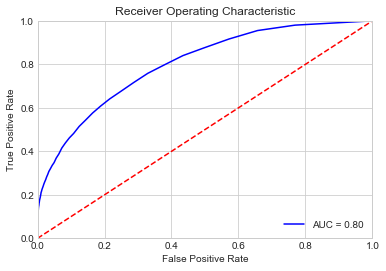

In [60]:
import sklearn.metrics as metrics

roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [61]:
from sklearn.metrics import roc_auc_score

RFC_auc = roc_auc_score(y_test, RFC.predict_proba(X_test)[:,1]) 
print("AUC for RFC: {:.3f}".format(RFC_auc))

AUC for RFC: 0.800


In [412]:
from keras.models import Sequential
from keras.layers import Dense

# define the keras model
model = Sequential()
model.add(Dense(4, input_dim=43, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=2, batch_size=10)


# evaluate the keras model
#accuracy = model.evaluate(X_test, y_test)
#print("Accuracy: {}".format(accuracy*100))

Epoch 1/2
110581/110581 [==============================] - 23s 206us/step - loss: 0.5514 - accuracy: 0.9127
Epoch 2/2
110581/110581 [==============================] - 23s 211us/step - loss: 0.2131 - accuracy: 0.9355
